In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.\
        builder.\
        appName("test_plot").\
        master("spark://spark-master:7077").\
        getOrCreate()

In [2]:
df = spark.read\
        .option("header", "true")\
        .csv('hdfs://192.168.2.237:9000/user/ubuntu/*.csv.bz2')\
        .toDF('date', 'subreddit')\
        .cache()

In [3]:
df.show()

+----------+--------------------+
|      date|           subreddit|
+----------+--------------------+
|2014-12-01|       pokemontrades|
|2014-12-01|                pics|
|2014-12-01|               apple|
|2014-12-01|  MaddenUltimateTeam|
|2014-12-01|           AskReddit|
|2014-12-01|       bravefrontier|
|2014-12-01|                 nfl|
|2014-12-01|     fantasyfootball|
|2014-12-01| electronic_cigar...|
|2014-12-01|         AsianBeauty|
|2014-12-01|        Borderlands2|
|2014-12-01|     GreenBayPackers|
|2014-12-01|                 WTF|
|2014-12-01|  AskRedditAfterDark|
|2014-12-01|                tifu|
|2014-12-01|      assassinscreed|
|2014-12-01|         OpTicGaming|
|2014-12-01| TheDescendantsOf...|
|2014-12-01|                pics|
|2014-12-01|                food|
+----------+--------------------+
only showing top 20 rows



In [4]:
# Get these by counting posts instead

most_popular = [' AskReddit', ' pics', ' funny', ' gaming', ' politics', ' reddit.com', ' WTF', ' atheism', ' IAmA', ' trees']

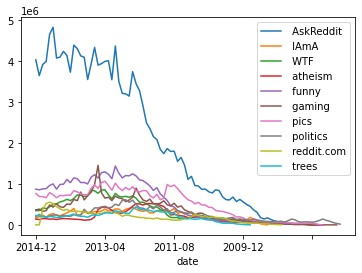

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql.functions import col, substring

pdf = df.filter(col('subreddit').isin(most_popular))\
        .withColumn('date', substring('date', 1, 7))\
        .groupBy(col('date'), col('subreddit'))\
        .count()\
        .orderBy('date', ascending=False)\
        .toPandas()

fig, ax = plt.subplots()

for name, group in pdf.groupby('subreddit'):
    group.groupby('subreddit').plot.line(x='date', y='count', ax=ax, label=name)

In [7]:
spark.stop()

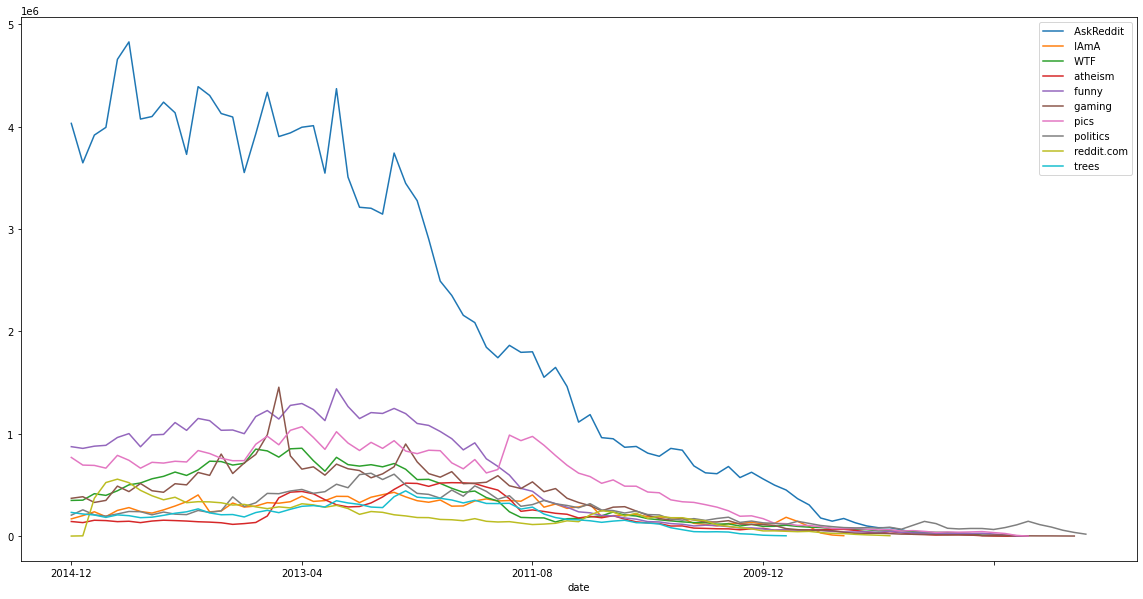

In [12]:
fig, ax = plt.subplots()

for name, group in pdf.groupby('subreddit'):
    group.groupby('subreddit').plot.line(x='date', y='count', ax=ax, label=name, figsize=(20, 10))